<a href="https://colab.research.google.com/github/Shiva-Gangadhar/Face-Mask-Detection-System/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown


In [1]:
from zipfile import ZipFile
# dataset = '/content/face-mask-dataset.zip'
dataset = '/content/Total_Data.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()

  print('The dataset is extracted')

The dataset is extracted


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
# with_mask_files = os.listdir('/content/data/with_mask')
# without_mask_files = os.listdir('/content/data/without_mask')
with_mask_files = os.listdir('/content/Total_Data/with_mask')
without_mask_files = os.listdir('/content/Total_Data/without_mask')

In [4]:
print(with_mask_files[0:5])
print(without_mask_files[0:5])

['0_0_3 copy 31.jpg', 'with_mask_2833.jpg', 'with_mask_3689.jpg', '0_0_8 copy 3.jpg', 'with_mask_964.jpg']
['without_mask_3474.jpg', 'without_mask_2274.jpg', 'without_mask_1506.jpg', 'without_mask_2350.jpg', 'without_mask_2490.jpg']


In [5]:
print(with_mask_files[-5:])
print(without_mask_files[-5:])

['with_mask_3360.jpg', '0_0_6f3feedbly1g35rq7j549j20xc0m877l.jpg', 'with_mask_2419.jpg', 'with_mask_1835.jpg', 'with_mask_3610.jpg']
['without_mask_627.jpg', 'without_mask_2313.jpg', 'without_mask_1183.jpg', 'without_mask_1492.jpg', 'without_mask_1887.jpg']


In [6]:
print('Number of with mask images:',len(with_mask_files))
print('Number of without mask images:',len(without_mask_files))

Number of with mask images: 4725
Number of without mask images: 4337


In [7]:
with_mask_labels = [1]*4725
without_mask_labels = [0]*4337

In [8]:
labels = with_mask_labels + without_mask_labels

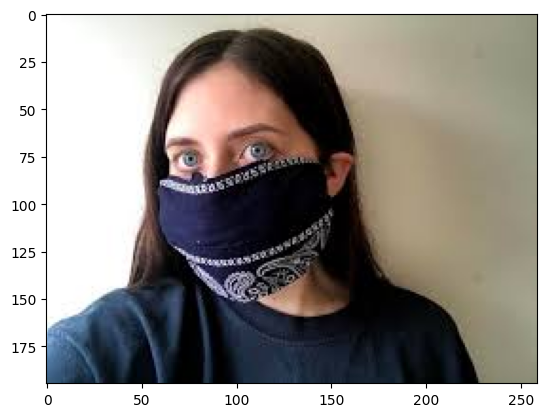

In [9]:
img = mpimg.imread('/content/Total_Data/with_mask/with_mask_3689.jpg')
imgplot = plt.imshow(img)
plt.show()

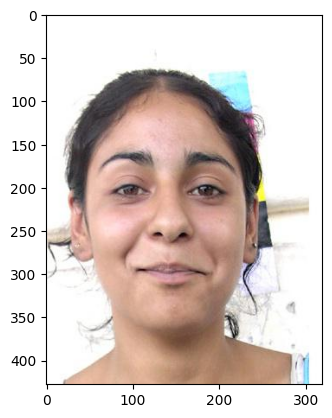

In [10]:
img = mpimg.imread('/content/Total_Data/without_mask/without_mask_1183.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

In [11]:
with_mask_path = '/content/Total_Data/with_mask/'

data =[]

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/Total_Data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


array([[[29, 28, 24],
        [28, 27, 23],
        [28, 27, 23],
        ...,
        [56, 55, 51],
        [55, 54, 51],
        [57, 56, 52]],

       [[29, 28, 24],
        [26, 25, 21],
        [29, 28, 24],
        ...,
        [58, 57, 53],
        [58, 57, 53],
        [59, 58, 54]],

       [[26, 22, 19],
        [24, 20, 17],
        [30, 26, 23],
        ...,
        [62, 60, 54],
        [64, 60, 56],
        [64, 61, 56]],

       ...,

       [[20, 15,  9],
        [21, 16, 10],
        [22, 16, 11],
        ...,
        [16, 10,  5],
        [15,  8,  1],
        [18, 11,  3]],

       [[20, 15,  9],
        [21, 16, 10],
        [23, 17, 12],
        ...,
        [16,  7,  3],
        [20, 11,  5],
        [20, 11,  4]],

       [[22, 15,  9],
        [23, 16, 10],
        [24, 17, 12],
        ...,
        [16,  7,  3],
        [23, 14,  5],
        [22, 12,  3]]], dtype=uint8)
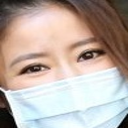

In [12]:
data[0]

In [13]:
data[0].shape

(128, 128, 3)

In [14]:
type(data)

list

In [15]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [16]:
print(X.shape)
print(Y.shape)

(9062, 128, 128, 3)
(9062,)


**Train Test Split**

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(9062, 128, 128, 3) (7249, 128, 128, 3) (1813, 128, 128, 3)


In [19]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [20]:
X_train_scaled[0]

array([[[0.43137255, 0.35686275, 0.34117647],
        [0.38431373, 0.30196078, 0.28235294],
        [0.38823529, 0.29411765, 0.2745098 ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.42352941, 0.34901961, 0.33333333],
        [0.38039216, 0.29803922, 0.27843137],
        [0.38823529, 0.29019608, 0.27058824],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.41568627, 0.33333333, 0.32156863],
        [0.38039216, 0.29803922, 0.27843137],
        [0.38431373, 0.28627451, 0.26666667],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314]],

       ...,

       [[0.88235294, 0.6       , 0.44313725],
        [0.89019608, 0.61176471, 0.45490196],
        [0.89411765, 0

**Building a Convolutional Neural Networks(CNN)**

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.layers import BatchNormalization

In [41]:
num_of_classes = 2

model = keras.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_of_classes,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
# from tensorflow.keras.optimizers import AdamW

# optimizer = AdamW(learning_rate=0.001, weight_decay=1e-4)
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [43]:
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - acc: 0.8186 - loss: 0.4800 - val_acc: 0.5255 - val_loss: 0.9303
Epoch 2/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - acc: 0.8935 - loss: 0.2582 - val_acc: 0.9186 - val_loss: 0.2800
Epoch 3/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.9131 - loss: 0.2207 - val_acc: 0.9103 - val_loss: 0.2020
Epoch 4/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.9323 - loss: 0.1833 - val_acc: 0.9324 - val_loss: 0.1704
Epoch 5/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9539 - loss: 0.1343 - val_acc: 0.9393 - val_loss: 0.1539
Epoch 6/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - acc: 0.9660 - loss: 0.1024 - val_acc: 0.9310 - val_loss: 0.2022
Epoch 7/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - acc: 0.9551 - loss: 0.1139 - val_acc: 0.9421 - val_loss: 0.1851
Epoch 8/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - acc: 0.9733 - loss: 0.0741 - val_acc: 0.9338 - val_loss: 0.2016
Epoch 9/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 19m

In [44]:
loss, accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test accuracy =',accuracy)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.9560 - loss: 0.1285
Test accuracy = 0.9531163573265076


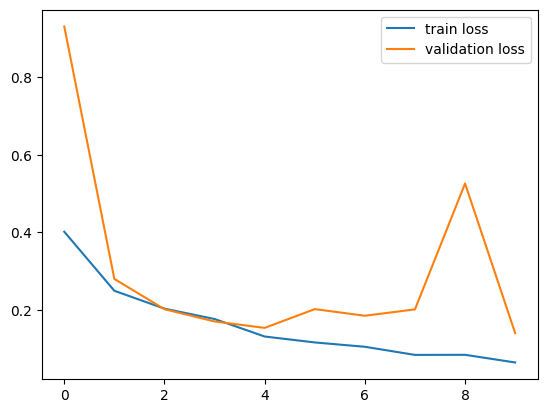

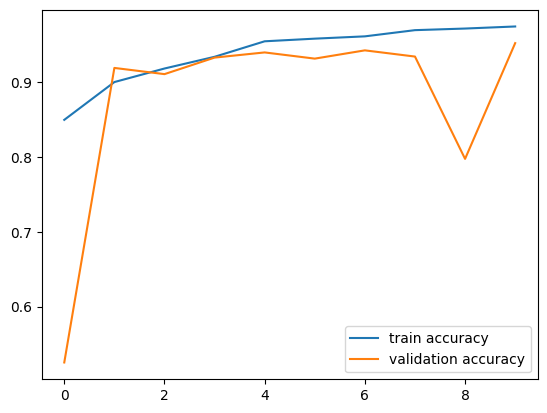

In [45]:
h = history

plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/input_image_without_mask.jpg


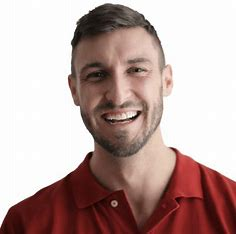

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.999666]]
0
The person in the image is not wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_prediction_label = np.argmax(input_prediction)

print(input_prediction_label)

if input_prediction_label ==1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')